## Libraries

In [29]:
import pandas as pd

# Cleaning libs
from bs4 import BeautifulSoup
import re
import nltk

# Set up Lemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

# Load english stop words
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Load stop words
stop_words =  set(stopwords.words("english"))

# Other cleaning libs
from bs4 import BeautifulSoup
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words

# Set up different stemmers
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

# build vocab
from collections import Counter
from itertools import chain

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/fabian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fabian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
art = pd.read_csv("articles.csv", sep =",")
art.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [10]:
art.shape

(337, 6)

## Data Cleaning

In [11]:
def clean_sentences(df, bStemming = False):

    sentences = []

    for sent in df:
        sent = str(sent).replace('\n', ' ')
        
        sent = sent.lower()
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
  
        #lemmatize each word to its lemma
        #lemma_words = [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
      
        sent_removed_sw = [word for word in words if word not in stop_words]
        
        if bStemming == True:
          stemmed_words = [porter.stem(i) for i in sent_removed_sw]
        else:
          stemmed_words = words
          
        cleaned_str = TreebankWordDetokenizer().detokenize(stemmed_words)  
        
        sentences.append(cleaned_str)

    return(sentences)

In [12]:
art['clean_title'] = clean_sentences(art['title'])
art['clean_text'] = clean_sentences(art['text'])
art.head()

,author,claps,reading_time,link,title,text,clean_title,clean_text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",chatbots were the next big thing what happened...,oh how the headlines blared chatbots were the ...
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,python for data science concepts you may have ...,if you ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,automated feature engineering in python toward...,machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,machine learning how to go from zero to hero f...,if your understanding of a i and machine learn...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,reinforcement learning from scratch insight data,want to learn about applied artificial intelli...


In [13]:
subset = art[['clean_title', 'clean_text',]]
tuples = [tuple(x) for x in subset.to_numpy()]

## Build Vocabulary

In [17]:
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [19]:
heads = art['clean_title']
desc = art['clean_text']

In [27]:
vocab, vocabcount = get_vocab(heads+desc)
print('Length of vocabulary: {}'.format(len(vocabcount)))

Length of vocabulary: 18563


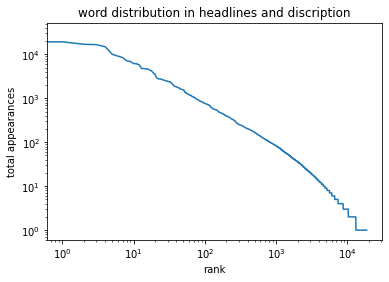

In [30]:
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');